<a href="https://colab.research.google.com/github/matkeii/THC/blob/main/Algortimo_usando_kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graficas**
La libreria ``networkx`` nos ayuda a generar graficas en python. Por ejemplo:

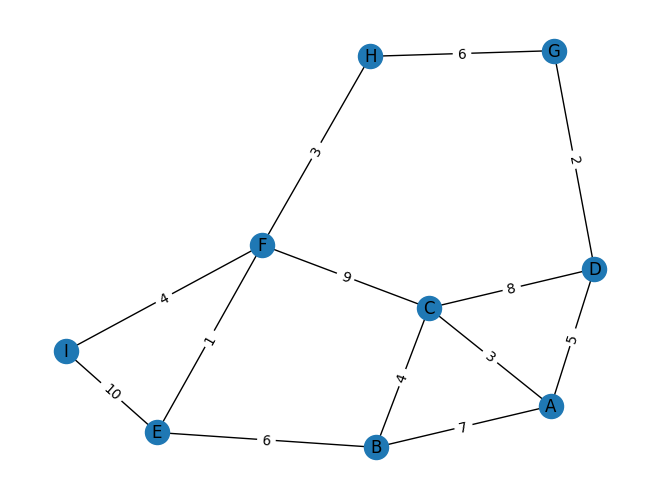

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir las conexiones y pesos en el formato de tu diccionario
aristas = {
    'A': [['B', 'C', 'D'], [7, 3, 5]],
    'B': [['C', 'E'], [4, 6]],
    'C': [['D', 'F'], [8, 9]],
    'D': [['G'], [2]],
    'E': [['F', 'I'], [1, 10]],
    'F': [['H', 'I'], [3, 4]],
    'G': [['H'], [6]],
}

# Crear el grafo
G = nx.Graph()

# Añadir nodos y aristas con pesos
for nodo, (conexiones, pesos) in aristas.items():
    for i, conexion in enumerate(conexiones):
        G.add_edge(nodo, conexion, weight=pesos[i])

# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)

# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True)

# Creamos Las Etiquetas Para Las Aristas
labels = {(u, v): d['weight'] for (u, v, d) in G.edges(data=True)}

# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Mostrar el gráfico
plt.show()


La notación ``lambda`` define funciones en una sola linea

In [ ]:
def f(x):
  return x**2
f(2)

4

In [ ]:
g = lambda x: x**2
g(2)

4

Empecemos el algoritmo de Kruskal

In [7]:
def kruskal(vertices, aristas, pesos):
  # generamos una lista que asocie aristas con pesos
  AP= [(aristas[i],pesos[i])for i in range(len(aristas))]
  # ordenamos las aristas de acuerdo a los pesos
  AP_ordenadas = sorted(AP, key=lambda x: x[1])
  # empezamos a generar el arbol
  Aristas_arbol = [AP_ordenadas[0][0],AP_ordenadas[1][0]]
  # para obetenr los vertices creamos una funcion auxiliar
  Vertices_arbol = obtener_vertices(Aristas_arbol,vertices)
  Arbol = (Aristas_arbol,Vertices_arbol)

  # hasta aqui ya tenemos el arbol del algoritmo con las primeras dos aristas
  # que ya sabemos que no forman un ciclo

  # podemos crear otra funcion auxiliar que nos ayude a saber si se forman ciclos en
  # una grafica dadas sus aristas y los vertices totales


# Es util crear una funcion que dados los vertices totales obtenga los vertices de un
# sibconjunto de aristas
def obtener_vertices(aristas,vertices_totales):
  vertices=[] # inicamos con una lista vacia
  for arista in aristas: #agregamos los dos vertices por cada arista
    vertices.append(vertices_totales[arista[0]])
    vertices.append(vertices_totales[arista[1]])
  return list(set(vertices))# primero aplicamos set para eliminar vertices repetidos
#def ciclos(aristas,vertices_totales):
  # hay que terminar esta funcion
#...............................................................................

def ciclos(aristas, vertices_totales):
    conjunto_nodos = {}
    resultados = []
    def encontrar_nodos(vertice):
        if conjunto_nodos[vertice] == -1:
            return vertice
        else:
            return encontrar_nodos(conjunto_nodos[vertice])

    def unir(subconjunto_1, subconjunto_2):
        conjunto_nodos[subconjunto_2] = subconjunto_1

    for vertice in vertices_totales:
        conjunto_nodos[vertice] = -1

    for arista in aristas:
        vertice1, vertice2 = arista
        nodo1 = encontrar_nodos(vertice1)
        nodo2 = encontrar_nodos(vertice2)

        if nodo1 == nodo2:
            resultados.append(arista)
        else:
            unir(nodo1, nodo2)

    return resultados

Codigo para ir probando la función

In [17]:
# Definimos los nodos (vertices)
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# Definimos las aristas como pares de índices
aristas = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4),
                   (2, 3), (2, 5), (3, 6), (4, 5), (4, 8),
                   (5, 7), (5, 8), (6, 7)]

# Definimos los pesos correspondientes a cada arista
pesos = [7, 3, 5, 4, 6, 8, 9, 2, 1, 10, 3, 4, 6]

AP= [(aristas[i],pesos[i])for i in range(len(aristas))]
AP_ordenadas = sorted(AP, key=lambda x: x[1])
Aristas_arbol = [AP_ordenadas[0][0],AP_ordenadas[1][0]]
Vertices_arbol = obtener_vertices(Aristas_arbol,vertices)
print(Aristas_arbol)
Vertices_arbol

[(4, 5), (3, 6)]


['F', 'E', 'G', 'D']

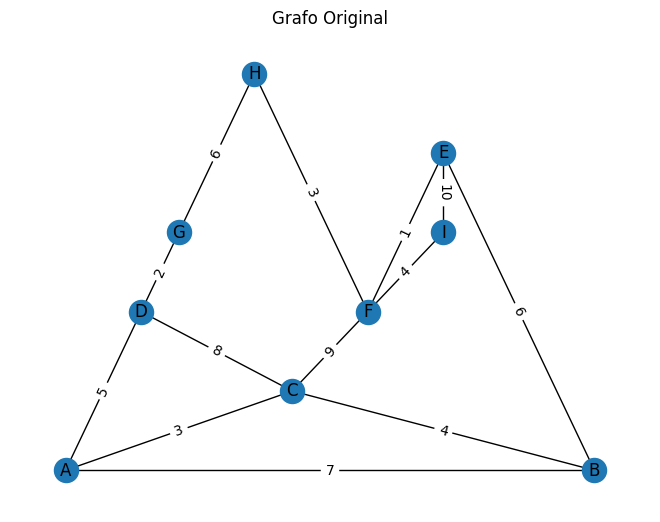

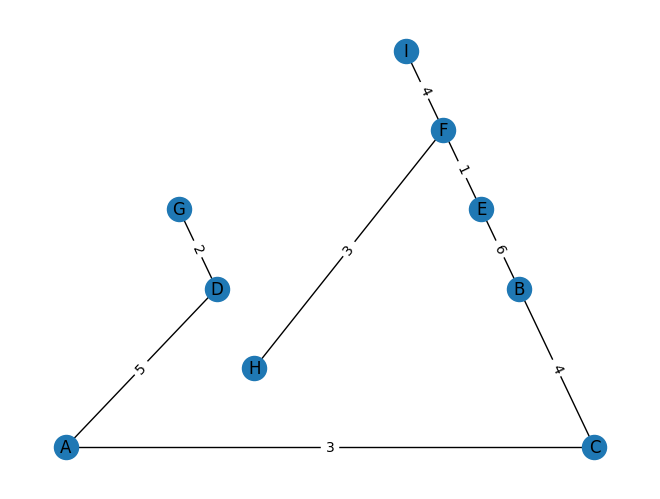

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

aristas = {
    'A': [['B', 'C', 'D'], [7, 3, 5]],
    'B': [['C', 'E'], [4, 6]],
    'C': [['D', 'F'], [8, 9]],
    'D': [['G'], [2]],
    'E': [['F', 'I'], [1, 10]],
    'F': [['H', 'I'], [3, 4]],
    'G': [['H'], [6]]
}

# Crear el grafo
G = nx.Graph()

#NODOS Y ARISTAS CON SU PESO
for nodo, (conexiones, pesos) in aristas.items():
    for i, conexion in enumerate(conexiones):
        G.add_edge(nodo, conexion, weight=pesos[i])

#KRUSKAL
kruskal = nx.minimum_spanning_tree(G)

#LUGAR DE VERTICES
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True)

#LUGAR DE ARISTAS
labels = {(u, v): d['weight'] for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo Original')
plt.show()

#ARBOL APLICANDO KRUSKAL
pos_kruskal = nx.planar_layout(kruskal)
nx.draw(kruskal, pos_kruskal, with_labels=True)
labels_kruskal = {(u, v): d['weight'] for (u, v, d) in kruskal.edges(data=True)}
nx.draw_networkx_edge_labels(kruskal, pos_kruskal, edge_labels=labels_kruskal)

plt.show()